# **Stock Price Prediction using LSTM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [5]:
path = "/kaggle/input/stock-data/AAPL.csv"
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
1,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
2,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
3,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
4,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800
...,...,...,...,...,...,...,...
2589,2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300
2590,2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000
2591,2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900
2592,2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300


In [6]:
df.replace("null", np.nan, inplace = True)
df.head
missing_data = df.isnull()
missing_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print(" ")

Date
Date
False    2594
Name: count, dtype: int64
 
Open
Open
False    2594
Name: count, dtype: int64
 
High
High
False    2594
Name: count, dtype: int64
 
Low
Low
False    2594
Name: count, dtype: int64
 
Close
Close
False    2594
Name: count, dtype: int64
 
Adj Close
Adj Close
False    2594
Name: count, dtype: int64
 
Volume
Volume
False    2594
Name: count, dtype: int64
 


In [8]:
df.drop(0, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
2,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
3,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
4,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800
5,2012-03-08,19.096071,19.392500,19.004286,19.356787,16.452162,516457200


In [9]:
df[["Open","High","Low","Close","Adj Close","Volume"]] = df[["Open","High","Low","Close","Adj Close","Volume"]].astype("float")


In [10]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400.0
2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400.0
2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800.0
2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800.0
2012-03-08,19.096071,19.392500,19.004286,19.356787,16.452162,516457200.0


In [11]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2012-03-02  19.437143  19.528570  19.375713  19.470715  16.548992  431712400.0
2012-03-05  19.479286  19.552856  18.785713  19.041430  16.184122  809124400.0
2012-03-06  18.702143  19.060356  18.436428  18.937857  16.096092  810238800.0
2012-03-07  19.171429  19.206429  18.689285  18.953215  16.109144  798520800.0
2012-03-08  19.096071  19.392500  19.004286  19.356787  16.452162  516457200.0
(2593, 6)


In [12]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


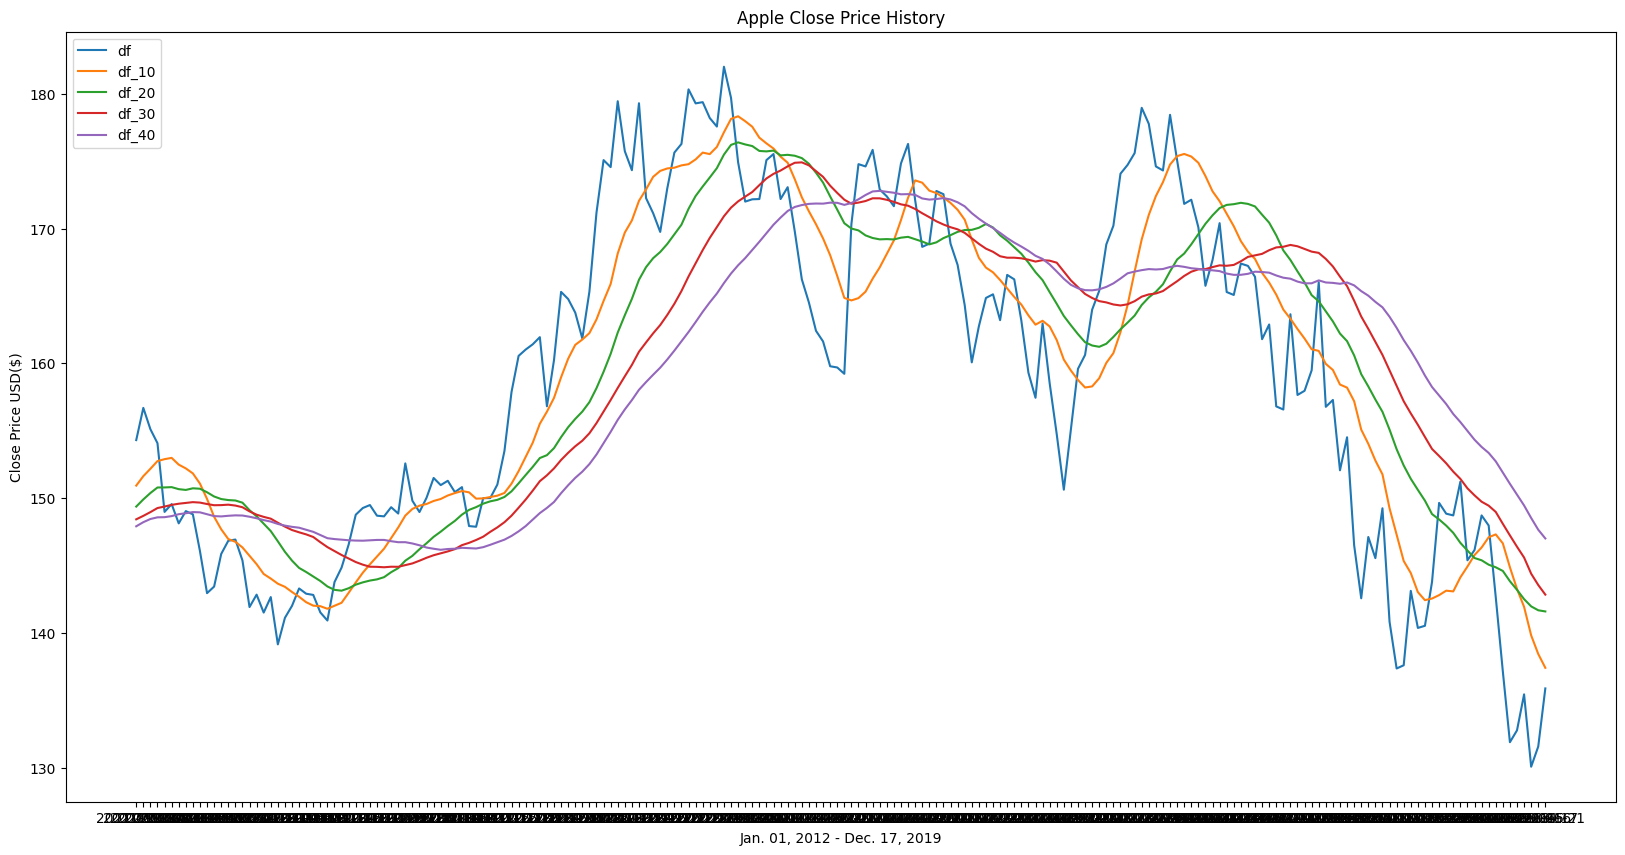

In [13]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [14]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-03-02,19.470715
2012-03-05,19.041430
2012-03-06,18.937857
2012-03-07,18.953215
2012-03-08,19.356787


In [15]:
dataset = data.values

In [16]:
import math
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
train, test = df[:training_data_len], df[training_data_len:]

In [17]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.03286405],
        [0.03030974],
        [0.02969346],
        ...,
        [0.69088881],
        [0.69981407],
        [0.72545927]]),
 (2593, 1))

In [18]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.03286405, 0.03030974, 0.02969346, 0.02978484, 0.03218616,
       0.03286193, 0.03431335, 0.03773469, 0.04229932, 0.04144504,
       0.04144717, 0.04474738, 0.04578017, 0.04504489, 0.04437338,
       0.04367423, 0.04599691, 0.04759072, 0.04825799, 0.04660894,
       0.044418  , 0.04847262, 0.0507443 , 0.04967964, 0.05167084,
       0.05221272, 0.0505573 , 0.05008129, 0.04935239, 0.04562503,
       0.04029114, 0.04657494, 0.04628593, 0.04184455, 0.03877172,
       0.0384997 , 0.03607289, 0.04663868, 0.04614992, 0.04515114,
       0.04110928, 0.04071615, 0.04153429, 0.04065027, 0.03712905,
       0.03802795, 0.03775169, 0.03796419, 0.03824894, 0.0374393 ,
       0.03563512, 0.03456197, 0.0330553 , 0.02966372, 0.02971896,
       0.03628539, 0.0353695 , 0.03825746, 0.03714393, 0.03650002])]
[0.038620829709805266]

[array([0.03286405, 0.03030974, 0.02969346, 0.02978484, 0.03218616,
       0.03286193, 0.03431335, 0.03773469, 0.04229932, 0.04144504,
       0.04144717, 0.04474738, 0.0

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2015, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - loss: 9.3991e-04
Epoch 2/5
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 1.6501e-04
Epoch 3/5
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 1.0089e-04
Epoch 4/5
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 7.5340e-05
Epoch 5/5
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 8.3250e-05


In [24]:

test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [25]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [26]:
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [27]:
print(lstm_predictions[0:5], y_test[0:5])

[[79.5496  ]
 [80.0817  ]
 [80.55838 ]
 [80.24318 ]
 [81.594536]] [[80.834999]
 [81.279999]
 [80.580002]
 [82.875   ]
 [83.364998]]


In [28]:
mse = np.mean(lstm_predictions-y_test)**2
rmse = np.sqrt(np.mean(lstm_predictions-y_test)**2)
mse, rmse

(6.809214429722456, 2.6094471502068126)

/tmp/ipykernel_31/1007574305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = lstm_predictions


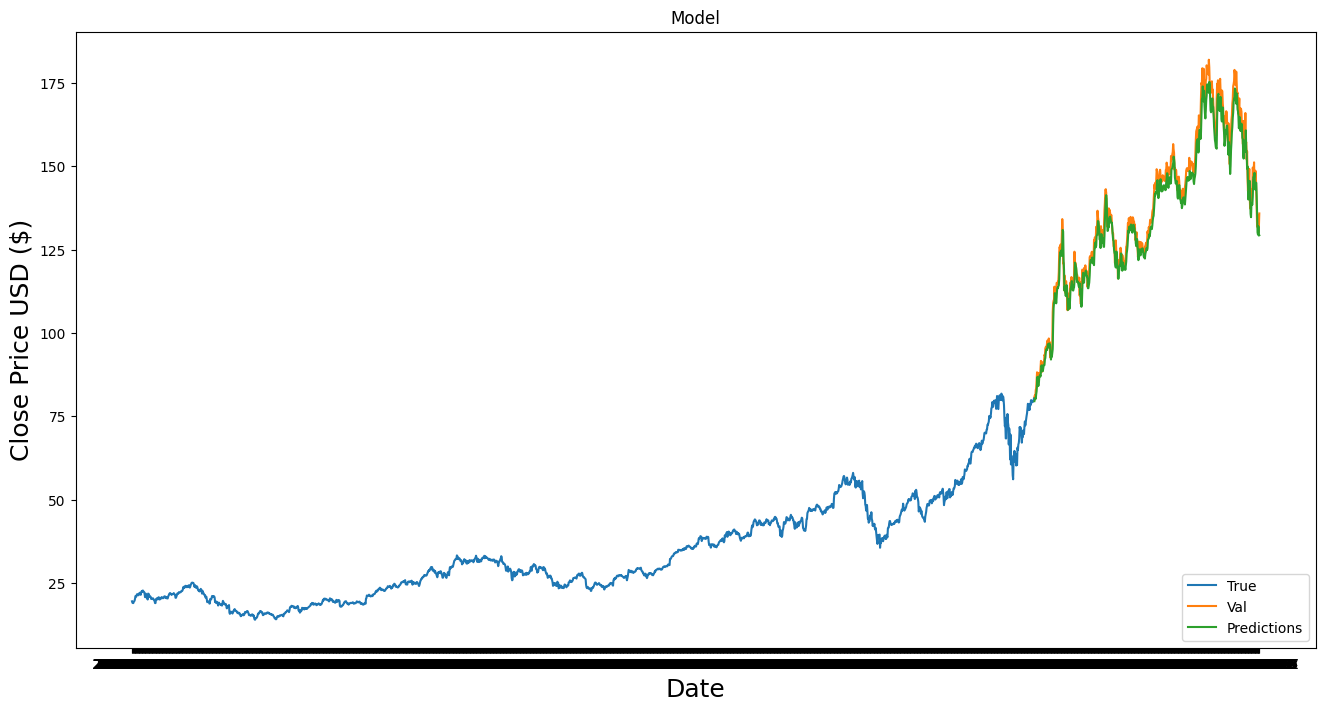

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = lstm_predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()